<a href="https://colab.research.google.com/github/nati-curious/Yandex-ML-training/blob/main/mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание №7

##### Автор: [Радослав Нейчев](https://www.linkedin.com/in/radoslav-neychev/), @neychev

In [ ]:
import numpy as np

import torch
from torch import nn
from torch.nn import functional as F

import torchvision
from torchvision.datasets import MNIST

from matplotlib import pyplot as plt
from IPython.display import clear_output

### Задача №1:
Обратимся к классической задаче распознавания рукописных цифр. Мы будем работать с набором данных [MNIST](http://yann.lecun.com/exdb/mnist/). В данном задании воспользуемся всем датасетом целиком.

__Ваша основная задача: реализовать весь пайплан обучения модели и добиться качества $\geq 92\%$ на тестовой выборке.__

Код для обучения модели в данном задании отсутствует. Присутствует лишь несколько тестов, которые помогут вам отладить свое решение. За примером можно обратиться к ноутбуку первого занятия.

Настоятельно рекомендуем написать код "с нуля", лишь поглядывая на готовые примеры, а не просто "скопировать-вставить". Это поможет вам в дальнейшем.

100%|██████████| 9912422/9912422 [00:00<00:00, 37800568.47it/s]


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 74636903.16it/s]


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 49486532.64it/s]

Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 11147178.92it/s]


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw



Text(0.5, 1.0, 'Image label: 2')

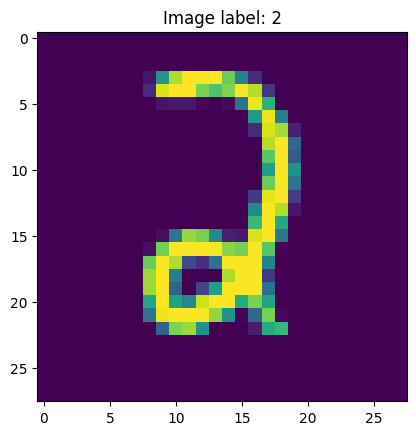

In [ ]:
# do not change the code in the block below
# __________start of block__________

train_mnist_data = MNIST('.', train=True, transform=torchvision.transforms.ToTensor(), download=True)
test_mnist_data = MNIST('.', train=False, transform=torchvision.transforms.ToTensor(), download=True)


train_data_loader = torch.utils.data.DataLoader(
    train_mnist_data,
    batch_size=32,
    shuffle=True,
    num_workers=2
)

test_data_loader = torch.utils.data.DataLoader(
    test_mnist_data,
    batch_size=32,
    shuffle=False,
    num_workers=2
)

random_batch = next(iter(train_data_loader))
_image, _label = random_batch[0][0], random_batch[1][0]
plt.figure()
plt.imshow(_image.reshape(28, 28))
plt.title(f'Image label: {_label}')
# __________end of block__________

In [ ]:
print(f'Number of training examples: {len(train_mnist_data)}')
print(f'Number of testing examples: {len(test_mnist_data)}')

Number of training examples: 60000
Number of testing examples: 10000


In [ ]:
# See classes
class_names = train_mnist_data.classes
class_names

['0 - zero',
 '1 - one',
 '2 - two',
 '3 - three',
 '4 - four',
 '5 - five',
 '6 - six',
 '7 - seven',
 '8 - eight',
 '9 - nine']

In [ ]:
image, label = train_mnist_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
image.shape

torch.Size([1, 28, 28])

In [ ]:
print(f"Length of train dataloader: {len(train_data_loader)}")
print(f"Length of test dataloader: {len(test_data_loader)}")

Length of train dataloader: 1875
Length of test dataloader: 313


In [ ]:
1875 * 32, 313 * 32, 10000 / 32

(60000, 10016, 312.5)

Постройте модель ниже. Пожалуйста, не стройте переусложненную сеть, не стоит делать ее глубже четырех слоев (можно и меньше). Ваша основная задача – обучить модель и получить качество на отложенной (тестовой выборке) не менее 92% accuracy.

*Комментарий: для этого достаточно линейных слоев и функций активации.*

__Внимание, ваша модель должна быть представлена именно переменной `model`.__

In [ ]:
# Creating model instance
model = nn.Sequential(
   nn.Flatten(),
   nn.Linear(784, 10),
   nn.ReLU(),
   nn.Linear(10, 10)
   )

In [ ]:
X.shape, y.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
len(train_data_loader)

1875

In [ ]:
32 * 1875

60000

In [ ]:
type(batch)

list

In [ ]:
len(X)

32

In [ ]:
epochs = 20

lr = 0.01
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=0.5)
scheduler = torch.optim.lr_scheduler.LinearLR(optimizer, start_factor=1.0, end_factor=0.1, total_iters=20)


# Set a model in training mode
model.train()
# Training loop
for epoch in range(epochs):
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_data_loader):
        # Zero gradients for every batch
        optimizer.zero_grad()
        # Make predictions for the batch / Forward pass
        y_pred = model(X)
        # Compute the loss
        loss = loss_fn(y_pred, y)
        # Compute gradients
        loss.backward()
        # Adjust/Update learning weights
        optimizer.step()


    before_lr = optimizer.param_groups[0]["lr"]
    scheduler.step()
    after_lr = optimizer.param_groups[0]["lr"]
    print("Epoch %d: SGD lr %.4f -> %.4f" % (epoch, before_lr, after_lr))

Epoch 0: SGD lr 0.0100 -> 0.0095
Epoch 1: SGD lr 0.0095 -> 0.0091
Epoch 2: SGD lr 0.0091 -> 0.0086
Epoch 3: SGD lr 0.0086 -> 0.0082
Epoch 4: SGD lr 0.0082 -> 0.0077
Epoch 5: SGD lr 0.0077 -> 0.0073
Epoch 6: SGD lr 0.0073 -> 0.0068
Epoch 7: SGD lr 0.0068 -> 0.0064
Epoch 8: SGD lr 0.0064 -> 0.0059
Epoch 9: SGD lr 0.0059 -> 0.0055
Epoch 10: SGD lr 0.0055 -> 0.0050
Epoch 11: SGD lr 0.0050 -> 0.0046
Epoch 12: SGD lr 0.0046 -> 0.0041
Epoch 13: SGD lr 0.0041 -> 0.0037
Epoch 14: SGD lr 0.0037 -> 0.0032
Epoch 15: SGD lr 0.0032 -> 0.0028
Epoch 16: SGD lr 0.0028 -> 0.0023
Epoch 17: SGD lr 0.0023 -> 0.0019
Epoch 18: SGD lr 0.0019 -> 0.0014
Epoch 19: SGD lr 0.0014 -> 0.0010


In [ ]:
optimizer.state

defaultdict(dict,
            {Parameter containing:
             tensor([[-0.0060, -0.0165, -0.0070,  ...,  0.0079, -0.0135, -0.0010],
                     [ 0.0349, -0.0228, -0.0203,  ...,  0.0296, -0.0140, -0.0316],
                     [ 0.0263,  0.0213, -0.0226,  ..., -0.0012, -0.0058,  0.0072],
                     ...,
                     [ 0.0145,  0.0019, -0.0327,  ...,  0.0019, -0.0058,  0.0298],
                     [ 0.0045, -0.0135, -0.0069,  ..., -0.0148,  0.0039, -0.0088],
                     [-0.0055,  0.0249, -0.0291,  ..., -0.0346, -0.0321,  0.0005]],
                    requires_grad=True): {'momentum_buffer': tensor([[0., 0., 0.,  ..., 0., 0., 0.],
                      [0., 0., 0.,  ..., 0., 0., 0.],
                      [0., 0., 0.,  ..., 0., 0., 0.],
                      ...,
                      [0., 0., 0.,  ..., 0., 0., 0.],
                      [0., 0., 0.,  ..., 0., 0., 0.],
                      [0., 0., 0.,  ..., 0., 0., 0.]])},
             Paramete

In [ ]:
list(optimizer.state.values())[1]

{'momentum_buffer': tensor([-0.0017,  0.0193, -0.0149, -0.0359,  0.0134,  0.1745,  0.0034, -0.0519,
         -0.0830, -0.0203])}

Локальные тесты для проверки вашей модели доступны ниже:

In [ ]:
random_batch[0].shape

torch.Size([32, 1, 28, 28])

In [ ]:
x = random_batch[0].reshape(-1, 784)
x.shape

torch.Size([32, 784])

In [ ]:
# do not change the code in the block below
# __________start of block__________
assert model is not None, 'Please, use `model` variable to store your model'

try:
    x = random_batch[0].reshape(-1, 784)
    y = random_batch[1]

    # compute outputs given inputs, both are variables
    y_predicted = model(x)
except Exception as e:
    print('Something is wrong with the model')
    raise e


assert y_predicted.shape[-1] == 10, 'Model should predict 10 logits/probas'

print('Everything seems fine!')
# __________end of block__________

Everything seems fine!


Настройте параметры модели на обучающей выборке. Рекомендуем поработать с различными оптимизаторами.

Также, напоминаем, что в любой момент можно обратиться к замечательной [документации](https://pytorch.org/docs/stable/index.html) и [обучающим примерам](https://pytorch.org/tutorials/).  

Оценим качество классификации:

In [ ]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in train_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))  # torch.argmax will return the same class predictions for logits and probabilities, so F.softmax is not needed in this case
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
train_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()
print(f'Neural network accuracy on train set: {train_acc:3.5}')

Neural network accuracy on train set: 0.95648


In [ ]:
batch[0].reshape(-1, 784), batch[0].reshape(-1, 784).shape

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([16, 784]))

In [ ]:
b = batch[0]
b.shape

torch.Size([16, 1, 28, 28])

In [ ]:
batch[1]

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6])

In [ ]:
predicted_labels = []
real_labels = []
model.eval()
with torch.no_grad():
    for batch in test_data_loader:
        y_predicted = model(batch[0].reshape(-1, 784))
        predicted_labels.append(y_predicted.argmax(dim=1))
        real_labels.append(batch[1])

predicted_labels = torch.cat(predicted_labels)
real_labels = torch.cat(real_labels)
test_acc = (predicted_labels == real_labels).type(torch.FloatTensor).mean()
print(f'Neural network accuracy on test set: {test_acc:3.5}')

Neural network accuracy on test set: 0.9429


Проверка, что необходимые пороги пройдены:

In [ ]:
assert test_acc >= 0.92, 'Test accuracy is below 0.92 threshold'
assert train_acc >= 0.91, 'Train accuracy is below 0.91 while test accuracy is fine. We recommend to check your model and data flow'

### Сдача задания
Загрузите файл `hw07_data_dict.npy` (ссылка есть на странице с заданием) и запустите код ниже для генерации посылки. Код ниже может его загрузить (но в случае возникновения ошибки скачайте и загрузите его вручную).

In [ ]:
!wget https://raw.githubusercontent.com/girafe-ai/ml-course/23s_dd_ml/homeworks/hw07_mnist_classification/hw07_data_dict.npy

--2024-01-05 11:59:35--  https://raw.githubusercontent.com/girafe-ai/ml-course/23s_dd_ml/homeworks/hw07_mnist_classification/hw07_data_dict.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6272438 (6.0M) [application/octet-stream]
Saving to: ‘hw07_data_dict.npy.1’

hw07_data_dict.npy. 100%[===================>]   5.98M  --.-KB/s    in 0.07s   

2024-01-05 11:59:35 (86.9 MB/s) - ‘hw07_data_dict.npy.1’ saved [6272438/6272438]



In [ ]:
# do not change the code in the block below
# __________start of block__________
import os

assert os.path.exists('hw07_data_dict.npy'), 'Please, download `hw07_data_dict.npy` and place it in the working directory'

def get_predictions(model, eval_data, step=10):

    predicted_labels = []
    model.eval()
    with torch.no_grad():
        for idx in range(0, len(eval_data), step):
            y_predicted = model(eval_data[idx:idx+step].reshape(-1, 784))
            predicted_labels.append(y_predicted.argmax(dim=1))

    predicted_labels = torch.cat(predicted_labels)
    return predicted_labels

loaded_data_dict = np.load('hw07_data_dict.npy', allow_pickle=True)

submission_dict = {
    'train': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['train'])).numpy(),
    'test': get_predictions(model, torch.FloatTensor(loaded_data_dict.item()['test'])).numpy()
}

np.save('submission_dict_hw07.npy', submission_dict, allow_pickle=True) # ПЕРЕИМЕНОВАТЬ ИЛИ НЕТ, ЧТОБ hw03, a  не  hw07
print('File saved to `submission_dict_hw07.npy`')
# __________end of block__________

File saved to `submission_dict_hw07.npy`


На этом задание завершено. Поздравляем!

In [ ]:
hw07 = np.load('/content/hw07_data_dict.npy', allow_pickle=True).item()
hw07

{'train': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 'test': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)}

In [ ]:
import pandas as pd

for key in hw07:
    if isinstance(hw07[key], np.ndarray):
        hw07[key] = hw07[key].tolist()

df_hw07 = pd.DataFrame(hw07)
df_hw07

,train,test
0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...
995,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
996,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
997,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
998,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [ ]:
submission = np.load('submission_dict_hw07.npy', allow_pickle=True).item()
submission

{'train': array([0, 9, 0, 2, 8, 5, 7, 9, 4, 4, 0, 5, 7, 9, 0, 2, 4, 5, 5, 8, 7, 1,
        9, 5, 5, 7, 7, 2, 2, 2, 7, 2, 6, 1, 8, 6, 5, 2, 9, 6, 9, 8, 0, 4,
        4, 1, 9, 4, 4, 0, 3, 7, 7, 6, 3, 1, 3, 1, 0, 0, 3, 8, 0, 3, 1, 7,
        2, 5, 3, 5, 4, 2, 3, 4, 0, 1, 2, 1, 3, 2, 0, 8, 1, 7, 0, 2, 4, 5,
        0, 3, 1, 8, 9, 8, 8, 5, 9, 2, 9, 6, 3, 1, 5, 4, 3, 7, 0, 8, 6, 5,
        8, 6, 2, 4, 4, 8, 1, 5, 3, 6, 0, 6, 6, 8, 9, 9, 6, 7, 7, 7, 9, 0,
        6, 5, 7, 2, 0, 0, 8, 9, 7, 7, 9, 6, 8, 1, 3, 1, 5, 7, 1, 4, 4, 5,
        4, 2, 3, 8, 2, 0, 0, 3, 1, 0, 6, 4, 3, 6, 4, 4, 6, 2, 1, 8, 4, 3,
        7, 8, 8, 9, 9, 0, 3, 9, 9, 2, 3, 3, 9, 1, 1, 9, 6, 7, 8, 7, 6, 6,
        9, 3, 3, 2, 8, 2, 5, 4, 2, 2, 6, 9, 3, 7, 0, 8, 9, 6, 7, 0, 7, 6,
        1, 7, 1, 0, 9, 2, 2, 9, 3, 8, 0, 8, 6, 5, 1, 3, 2, 7, 9, 2, 0, 7,
        4, 9, 9, 6, 0, 9, 4, 6, 9, 2, 9, 5, 5, 3, 7, 6, 4, 3, 4, 0, 9, 3,
        3, 9, 8, 2, 6, 5, 1, 5, 8, 2, 5, 6, 0, 1, 1, 7, 6, 7, 5, 3, 1, 9,
        4, 2, 0, 6, 2, 1, 7, 

In [ ]:
for key in submission:
    if isinstance(submission[key], np.ndarray):
        submission[key] = submission[key].tolist()

df_submission = pd.DataFrame(submission)
df_submission

,train,test
0,0,7
1,9,2
2,0,1
3,2,0
4,8,4
...,...,...
995,8,2
996,7,2
997,0,0
998,9,8
